In [9]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
#from google.colab import files
import numpy as np

In [10]:
df = pd.read_csv("D:\Semester VIII\program_skripsi\dataset.csv", encoding='utf8')
df['stopword_removal']

0        indriver halo admin yth pihak indriver ko argo...
1        sangat mudah paham lebih enak nya milih kemudi...
2        buat kan auto bid terlalu_neg bahaya terima or...
3        aplikasi perlu autobid kamu perlu bawa uang pu...
4        ikan system adil kemudi padahal jarak meter lo...
                               ...                        
12136                    tunggu autobid nya segera mungkin
12137                                                bagus
12138            sangat bantu moga aplikasi nya lebih baik
12139    dong auto bit nya aktif pakai aplikasi tambah ...
12140    pihak aplikator ada_neg tindak soal kemudi pak...
Name: stopword_removal, Length: 12141, dtype: object

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
# Pisahkan data menjadi fitur dan label
X = df['stopword_removal'] # Kolom teks sebagai fitur
y = df['kelas'] # Kolom sentimen sebagai label

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Inisialisasi objek TfidfVectorizer
vectorizer = TfidfVectorizer()

# Terapkan vektorisasi pada data latih dan data uji
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [14]:
# Inisialisasi objek LogisticRegression
logreg = LogisticRegression()

# Latih model Regresi Logistik dengan data latih yang telah diberikan vektorisasi TF-IDF
logreg.fit(X_train_tfidf, y_train)


LogisticRegression()

In [15]:
print("Klasifikasi dengan metode REGRESI LINEAR")
# Lakukan prediksi pada data uji
y_pred = logreg.predict(X_test_tfidf)

# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

# Tampilkan laporan klasifikasi
report = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", report)


Klasifikasi dengan metode REGRESI LINEAR
Akurasi: 89.17%
Laporan Klasifikasi:
               precision    recall  f1-score   support

     Negatif       0.87      0.98      0.92      1461
      Netral       0.74      0.32      0.45       207
     Positif       0.95      0.88      0.92       761

    accuracy                           0.89      2429
   macro avg       0.85      0.73      0.76      2429
weighted avg       0.89      0.89      0.88      2429



<function confusion_matrix at 0x000001D2BF712830>


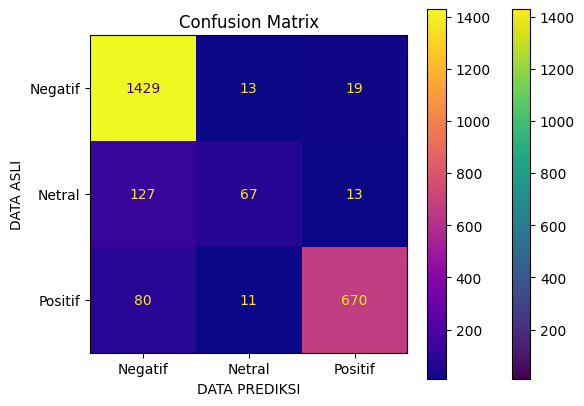

In [16]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


confus_matriks = confusion_matrix(y_test, y_pred, labels=['Negatif', 'Netral', 'Positif'])
matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix)
plt.imshow(confus_matriks, cmap=plt.cm.plasma)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel('DATA ASLI')
plt.xlabel('DATA PREDIKSI')
plt.show()